# Física Numérica
## Tarea 4

1. **Estudiando una caminata aleatoria en 2D**

(a) Escriba un programa que genere una caminata aleatoria en 2D. Para asegurar la aleatoriedad, elija valores aleatorios independientes para $\Delta x'$ y $\Delta y'$ en el rango $[-1,1]$, después normaliza para cada que cada paso sea unitario:

$$\Delta x = \frac{1}{L} \Delta x', \quad \Delta y = \frac{1}{L} \Delta y',\quad L = \sqrt{ \Delta x'^2 + \Delta y'^2} \tag{1}$$

*Solución.*  
Para generar los números aleatorios uniformemente distribuidos en el intervalo [-1,1] nos apoyaremos de la siguiente librería:

In [44]:
import numpy as np

Para este inciso crearemos una función llamada `pasos_normalizados`. Esta función tendrá como parámetro un entero $n$ que será el número de pasos a realizar. Dentro de la función se crearan dos arreglos de $n$ números aleatorios en el intervalo [-1,1]. Después de esto, a través de un ciclo `for` se usará (1) para normalizar cada valor de ambos arreglos de forma que cada pareja $(\Delta x_i, \Delta y_i)$, con $i=1,2,...,n$, esté normalizada. Finalmente la función regresa los arreglos que contienen los $n$ pasos normalizados. 

In [45]:
def pasos_normalizados(n: int):
    """Esta función genera dos arreglos cuyos elementos son los n pasos 
    normalizados generados aleatoriamente en el intervalo [-1,1]"""
    
    x = np.random.uniform(-1,1,n) #genera un arreglo independiente con n elementos para los pasos en x
    y = np.random.uniform(-1,1,n) #genera un arreglo independiente con n elementos para los pasos en y
    
    for i in range(n):
        L = np.sqrt( x[i]**2 + y[i]**2 )
        x[i] = x[i]/L
        y[i] = y[i]/L
    
    return x, y

Pongamos a prueba la función anterior. Para ello tomaremos $n=5$ (cinco pasos) e imprimiremos el valor de $\sqrt{ \Delta x_i^2 + \Delta y_i^2}$ para cada pareja $(\Delta x_i, \Delta y_i)$ y corroborar que estén normalizados.

In [46]:
n = 5
x,y = pasos_normalizados(n)
for i in range(n):
    print(x[i]**2 + y[i]**2)
    


0.9999999999999998
0.9999999999999999
0.9999999999999999
0.9999999999999997
0.9999999999999998


Para cada caso se obtiene un valor muy cercano a 1, las pequeñas diferencias se deben al error de cálculo de la computadora. Por lo que podemos considerar que la función realiza lo que se solicitó en este inciso.

(b) Si su caminante virtual da N pasos en cada experimento, entonces
realice un total de $K \approx \sqrt{N}$ experimentos. Cada experimento
debe tener $N$ pasos e iniciar con una semilla diferente.

*Solución.*  
Para este inciso basta usar un ciclo `for` que itere $K \approx \sqrt{N}$ veces ($N$ es el número de pasos), y para asegurar que cada experimento inicia con una semilla diferente, en cada iteración debe llamarse a la función `pasos_normalizados` para generar distintos valores independientes. 

In [47]:
N = 100 #Número de pasos
K = int(np.sqrt(N)) #Número de experimentos

for i in range(K):
    x, y =  pasos_normalizados(N)

Para los siguientes incisos agregaremos más acciones dentro del ciclo `for`anterior para observar algunos resultados para cada experimento.

(c) Calcule la distancia al cuadrado $R^2$ para cada experimetno y después promedie sobre los $K$ experimentos para estimar $\langle R^2(N) \rangle$

*Solución.*  
Sea $R_i^2$ la distancia cuadrada para el $i$-ésimo experimento. Para cada experimento se han generado $N$ parejas $(\Delta x_j, \Delta y_i)$, que corresponden a cada paso de la caminata aleatoria. Así por teorema de Pitágoras, tenemos que la distancia cuadrada para un experimento es:
$$R_i^2 = \left( \displaystyle\sum_{j=1}^{N} \Delta x_j \right)^2 + \left( \displaystyle\sum_{j=1}^N \Delta y_j \right)^2 \tag{2}$$
Luego, para estimar la distancia cuadrática media de los $K$ experimentos usaremos la siguiente expresión:
$$ \langle R^2(N)\rangle = \frac{1}{K}\sum_{i=1}^K R_i^2 (N)$$
Para hacer estos cálculos nos apoyaremos del ciclo `for` creado en el inciso anterior. Imprimiremos el valor de $R_i^2$ para cada experimento y el valor final de  $\langle R^2(N) \rangle$. Tomaremos $N=1000$ pasos.

In [134]:
N = 1000 #Número de pasos
K = int(np.sqrt(N)) #Número de experimentos

R_i = 0.0 #Distancia cuarática del i-ésimo experimento
sumaR_i = 0.0 #Suma de todos distancias cadradas


for i in range(K):
    x, y =  pasos_normalizados(N) #Este crea los arreglos de un experimento
    
    #Se obtienen las sumatorias de los pasos en x, y. 
    suma_x = sum(x)
    suma_y = sum(y)
    
    R_i = sum(x)**2 + sum(y)**2 #Se calcula la distancia cuadrada para el experimento
    print(f'Experimento: {i+1:3} ----- R_{i+1:<3} = {R_i:10.8}')
    
    sumaR_i += R_i #Se suman todas las R_i's cuadradas.

R = sumaR_i/K   
print(f'Distancia cuadrática media de los {K} experiemntos ----- R^2 = {R}')

Experimento:   1 ----- R_1   =  1140.5658
Experimento:   2 ----- R_2   =  153.72208
Experimento:   3 ----- R_3   =   158.7515
Experimento:   4 ----- R_4   =  16.537993
Experimento:   5 ----- R_5   =  6035.3091
Experimento:   6 ----- R_6   =  864.12231
Experimento:   7 ----- R_7   =  166.60278
Experimento:   8 ----- R_8   =  2810.5746
Experimento:   9 ----- R_9   =  3514.7457
Experimento:  10 ----- R_10  =  1437.6651
Experimento:  11 ----- R_11  =  377.58455
Experimento:  12 ----- R_12  =  340.78247
Experimento:  13 ----- R_13  =  1520.0807
Experimento:  14 ----- R_14  =  1051.9202
Experimento:  15 ----- R_15  =  496.89731
Experimento:  16 ----- R_16  =  599.38956
Experimento:  17 ----- R_17  =  2067.0515
Experimento:  18 ----- R_18  =  1451.9279
Experimento:  19 ----- R_19  =  1788.3491
Experimento:  20 ----- R_20  =  834.83172
Experimento:  21 ----- R_21  =  1040.9856
Experimento:  22 ----- R_22  =  141.67411
Experimento:  23 ----- R_23  =  586.25471
Experimento:  24 ----- R_24  =  40

(d) Revise la validez de la hipótesis teórica:
$$ \frac{\langle \Delta x_i \Delta x_j \rangle_{i \neq j}}{R^2} \approx 0 \tag{3}$$

*Solución.*  
Para esta parte realizaremos un experimento con $N=1000$ pasos y verificaremos  la condición establecida para $\Delta x_i$ y $\Delta x_j$ donde escogeremos aleatoriamente a $i$ y $j$.  
Teóricamente, en la deducción de la discancia cuadrática media, también debe cumplirse lo mismo para:
$$\frac{\langle \Delta y_i \Delta y_j \rangle_{i \neq j}}{R^2} \approx 0 \tag{4}$$ 
No se pide calcular esto en el ejercicio, pero lo realizaremos para ver que efectivamente se cumple.  
En el siguiente algoritmo primero generamos una caminata aleatoria de 1000 pasos. Después, escogemos aleatoriamente los subíndices $i$ y $j$ en el intervalo $[1,1000]$ para así evaluar las condiciones desadas. Esto lo haremos 10 veces para tener distintos resultados y así poder visualizar mejor lo que se quiere validar. Esa es la razón por la cual se usó un ciclo `for`. Además, para poder asegurar que $i\neq j$ hemos agregado una sentencia `if` con esta condición.

In [144]:
N = 1000 #Número de pasos

x, y =  pasos_normalizados(N) #Se crean los arreglos

R = sum(x)**2 + sum(y)**2 #Se calcula la distancia cuadrada 

for _ in range(10): #Haremos 10 cálculos distintos para ver mejor el resultado
    i = np.random.randint(0,len(x)-1) #escogemos a x_i aleatoriamente
    j = np.random.randint(0,len(x)-1) #escogemos a x_j aleatoriamente
    
    if i != j:
        valor = x[i]*x[j]/(R*N*(N-1)) #Calculamos la estimación deseada
        print(f'Tomando x_{i+1:<3} y  x_{j+1:<3} obtenemos: {valor:10.6}')
          
        valor = y[i]*y[j]/(R*N*(N-1)) #Calculamos la estimación deseada
        print(f'Tomando y_{i+1:<3} y  y_{j+1:<3} obtenemos: {valor:10.6}')
        print("-"*80) 

Tomando x_832 y  x_966 obtenemos: -2.52803e-10
Tomando y_832 y  y_966 obtenemos: 6.03511e-11
--------------------------------------------------------------------------------
Tomando x_777 y  x_30  obtenemos: -3.49575e-10
Tomando y_777 y  y_30  obtenemos: 4.12653e-11
--------------------------------------------------------------------------------
Tomando x_793 y  x_404 obtenemos: 8.74305e-11
Tomando y_793 y  y_404 obtenemos: -3.04044e-10
--------------------------------------------------------------------------------
Tomando x_310 y  x_951 obtenemos: -1.64312e-10
Tomando y_310 y  y_951 obtenemos: -2.54246e-10
--------------------------------------------------------------------------------
Tomando x_827 y  x_650 obtenemos: 1.14223e-10
Tomando y_827 y  y_650 obtenemos: 1.51095e-10
--------------------------------------------------------------------------------
Tomando x_807 y  x_842 obtenemos: -2.76021e-11
Tomando y_807 y  y_842 obtenemos: 1.25382e-10
-------------------------------------

Podemos ver que todos los resultados obtenidos tenemos valores muy pequeños. Esto quiere decir que $\langle \Delta x_i, \Delta x_j\rangle_{i\neq j}$, $\langle \Delta x_i, \Delta y_j\rangle_{i\neq j}$ y $\langle \Delta y_i, \Delta y_j\rangle_{i\neq j}$ son muy pequeños en comparación con el valor de $R^2$. Esto comprueba las condiciones de (3) y (4).

(e) Grafique el valor cuadrático medio de la distancia $R_{rms}$ como función de $\sqrt{N}$. Los valores de $N$ deben ser pequeños al principio (ahí no esperamos que se cumpla que $R_{rms} \approx \sqrt{N}$) pero al final, los valores de $N$ deben ser realmente grandes (considere al menos dos o tres cifras decimales en el promedio).

*Solución:*  
Para poder hacer el gráfico importamos la siguiente librería.

In [83]:
import matplotlib.pyplot as plt

Por definición:
$$R_{rms} = \sqrt{\frac{1}{K}\displaystyle\sum_{i=1}^{K} R_i^2} \tag{5}$$
Donde $K$ es el número de experimentos realizados, recordemos que $K\approx \sqrt{N}$. En el siguiente algoritmo se utilizan dos ciclos `for` donde uno itera sobre el número de pasos $N$ y el otro sobre el Número de experiemntos $K$. Por ejemplo, para un $N$ fijo obtenemos un número $K$ de experimentos, para cada experimento se genera una distancia cuadrada $R_i^2$ y luego usando (5) obtenemos $R_{rms}$ para el $N$ fijo. Después aumentamos el número de pasos en 1 y repetimos lo anterior.

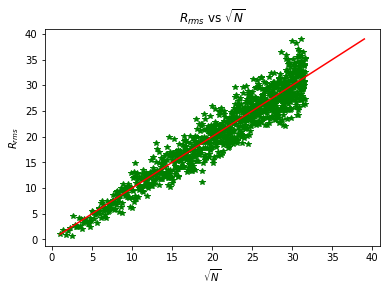

In [146]:
eje_y = [] #Aquí agregaremos los valores para el eje y
eje_x = [] #Aquí agregaremos los valores para el eje x

for i in range(1,1000): #i es el número de pasos
    K = int(np.sqrt(i)) #Número de experimentos
    R_rms = 0.0
    
    for _ in range(0,K):
        x, y =  pasos_normalizados(i) #Este crea los arreglos de un experimento
        
        R_i = sum(x)**2 + sum(y)**2 #Se calcula la distancia cuadrada para el experimento
        R_rms += R_i #suma todos los cuadrados de R_i^2
        
    R_rms = np.sqrt(R_rms/K)
    
    eje_y.append(R_rms)
    eje_x.append(np.sqrt(i))

m = [x for x in range(1,40)]
n = [x for x in range(1,40)]

plt.plot(eje_x, eje_y, "g*")
plt.plot(m,n, "r")
plt.title('$R_{rms}$ vs $\sqrt{N}$')
plt.xlabel('$\sqrt{N}$')
plt.ylabel('$R_{rms}$')
plt.show()

El proceso anterior se realizó para $N\in [1,1000]$, por lo que $\sqrt{N}\in[1,32]$. No es recomendable aumentar más el valor de $N$ ya que la computadora tarda demasiado en realizar los cálculos. A pesar de ello, con estas iteraciones hechas podemos apreciar que la dispersión de datos sigue una tendencia lineal. Si se toman valores mucho mayores se seguirá teniendo una tendencia lineal. Además, la recta color rojo representa la relación $R_{rms}=\sqrt{N}$ (una recta de pendiente 1), con esto se confirma que para $N$'s muy grandes se aproximará mucho a la recta color rojo.